# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Paul Zuendel

Datum: 17.11.2023

Gruppe: 99

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Welche spezifische Wärmekapazität haben meine Sensoren.

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.

Man nehme zwei Behälter und fülle beide mit der gleichen Menge an Wasser. Den einen mit Wasser auf Rumtemperatur und den zweiten mit 80° heißem Wasser. Nun führe man in jeden Behälter jeweils einen Sensor ein und startet die Messung wenn sich die Sensoren an die Umgebungstemperaturen angepasst haben. Nach 20 sek schüttet man die beiden Behälter zusammen, führt beide Sensoren ein und wartet bis sich die Temperaturanzeigen der Sensoren angleichen. Anschließend kann man die Messung beenden.


![Veruschsaufbau](Versuch_Kapazität.jpg)


## Versuchsauswertung

In [6]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib
import h5py

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [9]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

path_capacity = "/home/jovyan/work/calorimetry_home/data/heatcapacity_zuendel.h5"

# DONE #

In [18]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.

with h5py.File(path_capacity, 'r') as f:
    capacity_data = f["RawData"]
    dataset_capacity = {}
    
    for uuid_key in capacity_data.keys():
        uuid_group = capacity_data[uuid_key]
        
        attributes = dict(uuid_group.attrs)
        
        temp_data = uuid_group['temperature'][:]
        time_data = uuid_group['time'][:]
        
        dataset_capacity[uuid_key] = {
            'attributes': attributes,
            'temperature': temp_data,
            'time': time_data
        }
        
        
       
# DONE #

#### (ii) Daten ploten

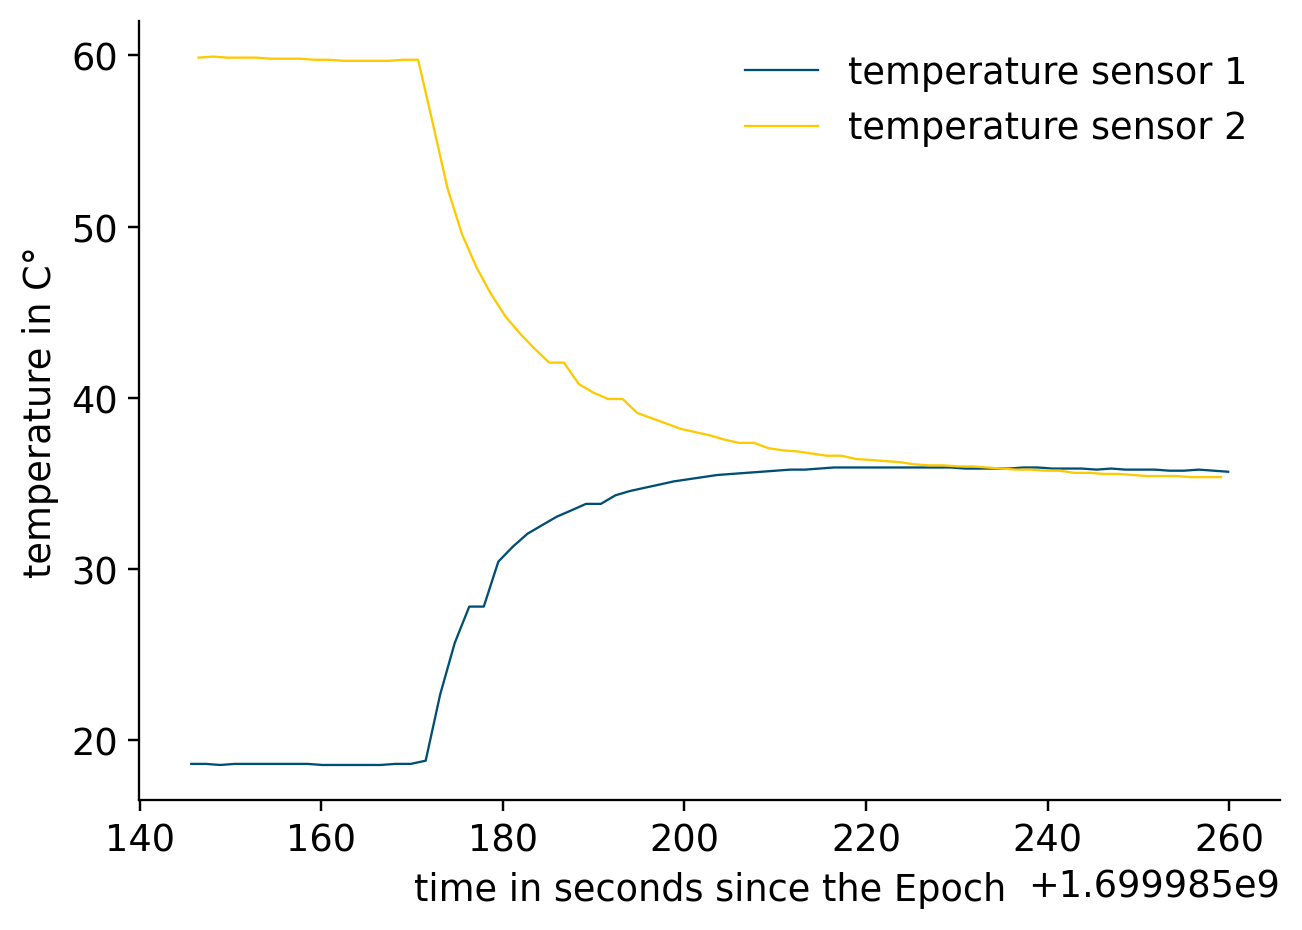

In [24]:
# TODO: Use the temperature and time data for plotting

# Erster Sensor
uuid_1_data = dataset_capacity['1ee822cb-e29f-6a7f-8e1f-ecc9f433cf9e']
time_data_1 = uuid_1_data['time']
temperature_data_1 = uuid_1_data['temperature']   

# Zweiter Sensor
uuid_2_data = dataset_capacity['1ee822cc-8cfc-68bc-bdcb-5fcdd9fe6243']
time_data_2 = uuid_2_data['time']
temperature_data_2 = uuid_2_data['temperature']   

plt.plot(time_data_1, temperature_data_1, label= 'temperature sensor 1')
plt.plot(time_data_2, temperature_data_2, label= 'temperature sensor 2')

plt.xlabel('time in seconds since the Epoch')
plt.ylabel('temperature in C°')
plt.legend()
plt.show()
# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [41]:
# Heat capacity of Water
water_heat_capa = 4.18

# TODO: Read mass from the metadata of the experiment.

json_folder = "/home/jovyan/work/calorimetry_home/data/"

mass = m_json.get_json_entry(json_folder,'1ee822d6-6317-6e43-893e-73bbb5fafab0',['probe','metadata'])

mass_total_kg = int(mass)*2/1000

print(mass_total_kg)

# DONE #

0.5


#### (iV) Anfangs- und Endwert der Temperatur

In [44]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity

start_temp_1 = temperature_data_1[0]
end_temp_1 = temperature_data_1[-1]

start_temp_2 = temperature_data_2[0]
end_temp_2 = temperature_data_2[-1]


# DONE #

35.375


#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [47]:
# TODO: Calculate heat capacity of the calorimeter

m_add = mass_total_kg/2 
m_cup = mass_total_kg/2 

T_1 = start_temp_1
T_2 = start_temp_2
T_M = end_temp_1
c_w = water_heat_capa

heat_capacity = (m_add*c_w*(T_2-T_M))/(T_M-T_1)-m_cup*c_w
# DONE #

#### (Vi) Ergebnis

In [50]:
# TODO: Print result

print('Wäremkapazität Kalorimeter in kJ/kg*K')
print(heat_capacity)
# DONE #

Wäremkapazität Kalorimeter in kJ/kg*K
0.4363736263736264


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

 Im Vergleich zu vielen anderen Stoffen haben die Sensoren mit 0.4364 kJ/kg*K eine sehr kleine spezifische Wärmekapazität, was dazu führt, dass sie sich in Abhängigkeit ihres Umgebungsmediums schnell erwärmen und abkühlen und sich so an dessen Temperatur angleichen. Dies ist auch notwendig um genaue Messergebnisse bei schnellen Temperaturänderungen zu erzeugen

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

In [2]:
'Das Material der Sensoren ist sinnvoll gewählt und sie können ihren Job erfüllen. Sie sind jedoch nicht in der Lage schnelle Zemperaturänderungen genau darzustellen, eignen sich also vorallem für Messungen mit langsamen Temperaturänderungen.' 

'Das Material unserer Sensoren ist sinnvoll gewählt und sie können ihren Job erfüllen. Sie sind jedoch nicht in der Lage schnelle Zemperaturänderungen genau darzustellen, eignen sich also vorallem für Messungen mit langsamen Temperaturänderungen.'